In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing data
training = pd.read_csv('/Users/mzheng/ds/titanic/data/train.csv')
test = pd.read_csv('/Users/mzheng/ds/titanic/data/test.csv')

# temporary column to differentiate between training and test rows
training['train_test'] = 1
test['train_test'] = 0

# no y column in test set, everything is x
test['Survived'] = np.NaN

all_data  = pd.concat([training, test])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

Project Planning

1. Data exploration
2. Feature engineering
3. Data preprocessing for model
4. Model building
5. Model tuned performance
6. Model additional ensemble approaches

1. Data Exploration

In [3]:
# quick look at data types and null counts
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
# gives us understanding of central tendencies of the data
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
# quick way to separate numeric columns
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [6]:
# Numerical variables
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]

# Categorical variables
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

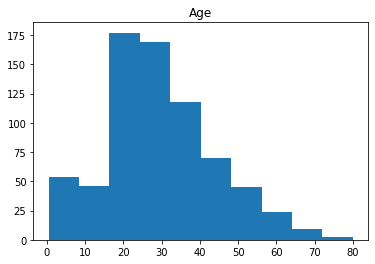

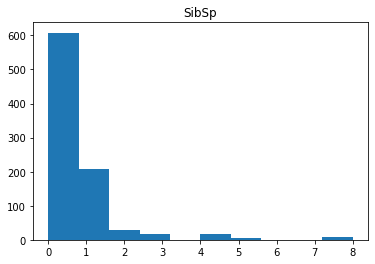

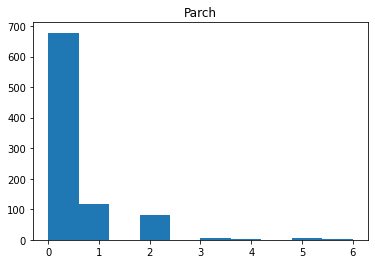

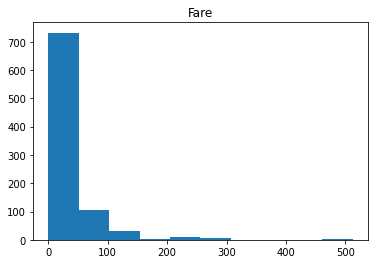

In [7]:
# Generate histograms for each numerical variable

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

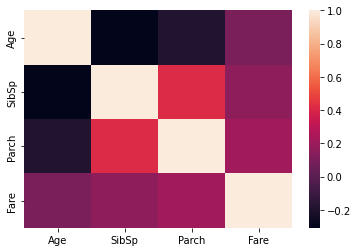

In [8]:
# create corelation matrix
print(df_num.corr())
sns.heatmap(df_num.corr())

In [9]:
# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(training, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


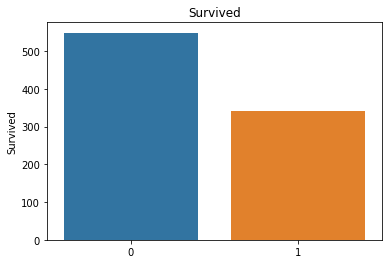

/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


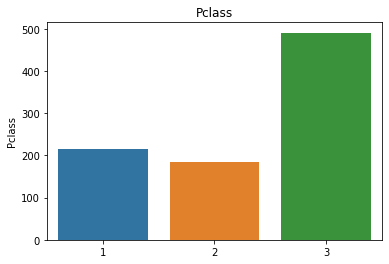

/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


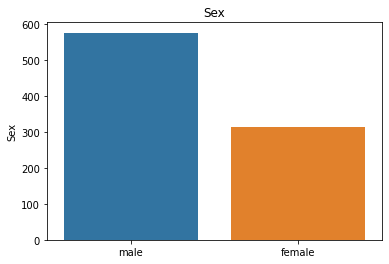

/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


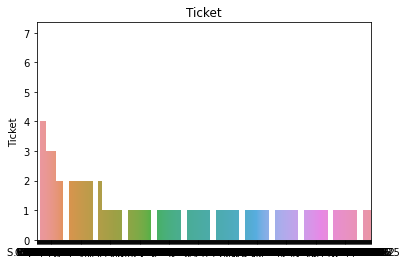

/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


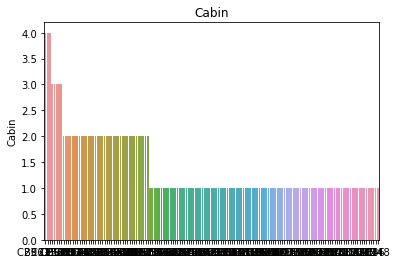

/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


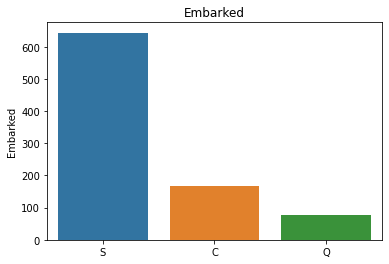

In [10]:
# generate bar plots for each categorical variable
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

Cabin and ticket graphs are very messy. Perhaps this an area where we can do some feature engineering.

In [11]:
# compare survival rate for each of these categorical variables
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


2. Feature Engineering

In [12]:
# feature engineering on cabin variable
# Option 1: categories based on # of cabin tickets
# If null, assign 0
# Else, split by ' ' and find the length of the list
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
# compare survival rate for '# of cabin tickets'
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
# Option 2: categories based on cabin letter (n stands for null)
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
training['cabin_adv'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [15]:
# compare survival rate by cabin letter
pd.pivot_table(training, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc = 'count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [16]:
# feature engineering on ticket variable
# Option 1: numeric vs. non-numeric tickets
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [17]:
# compare survival rates for numeric vs. non-numeric tickets
pd.pivot_table(training, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [18]:
# Option 2: ticket letters
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [19]:
# compare survival rates for ticket letters
pd.pivot_table(training, index = 'Survived', columns = 'ticket_letters', values = 'Ticket', aggfunc = 'count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [20]:
# feature engineering on person's title (name variable)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

3. Data Preprocessing for Model

    - Include only relevant variables ('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title')

    1. Drop null values from Embarked variable (only 2)

    2. Normalize fare using logarithm to give more semblance of a normal distribution

    3. Impute data with mean for fare and age (should also experiment with median)

    4. Do categorical transformation on all data (Usually use a transformer, like onehot encoder. But for this project, we use this approach)

    5. Scaling data to be from 0-1 with standard scaler

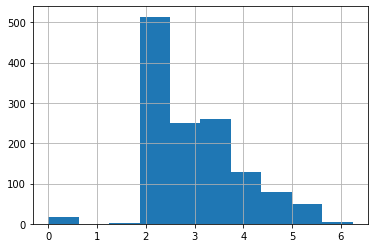

In [41]:
# create all categorical variables that we did above for all_data
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#1 drop null values from 'embarked' (2 in training, 0 in test)
all_data.dropna(subset=['Embarked'], inplace = True)

#2 normalize fare using logarithm
all_data['norm_fare'] = np.log(all_data.Fare + 1)
all_data['norm_fare'].hist()
# after normalizing, row 152 becomes null
all_data.dropna(subset=['norm_fare'], inplace = True)

#3 impute nulls for continuous data
# median
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#4 categorical transformations
# convert Pclass to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)
# create dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])


In [42]:
#5 scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test == 1].Survived

4. Model Building

First, see how various models perform with default paramaters. I try the following models using 5 fold cross validation to get a baseline. With a validation set baseline, we can see how much tuning improves each of the models. (Just because a model has a high baseline on this validation set doesn't mean it will do better on the eventual test set)

Baseline Validation Performance

Naive Bayes (72.6%)
Logistic Regression (82.1%)
Decision Tree (77.6%)
K Nearest Neighbor (80.5%)
Random Forest (80.6%)
Support Vector Classifier (83.2%) [Best]
Xtreme Gradient Boosting (81.8%)
Soft Voting Classifier - All Models (82.8%)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [24]:
# gaussian naive bayes
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [25]:
# logistic regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [26]:
# decision tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [27]:
# k nearest neighbor
knn = KNeighborsClassifier()
cv = cross_val_score(knn,  X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [28]:
# random forest
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.79213483 0.84831461 0.73595506 0.82485876]
0.8009268075922046


In [29]:
# support vector classifier
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [30]:
# xtreme gradient boosting
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963


In [31]:
# voting classifier 
# takes all of the inputs and averages the results
# for a "hard" voting classifier, each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. (generally want odd numbers for this)
# "soft" classifier averages the confidence of each model. If average confidence is > 50% that it is 1, it will be counted as such; else 0

voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83707865 0.81460674 0.8258427  0.79775281 0.84745763]
0.8245477051990097


In [43]:
# baseline submission results
# train model
voting_clf.fit(X_train_scaled, y_train)

# test model
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)

basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

5. Model Tuned Performance

After getting baselines, now we try to improve on the individual model results. I mainly use grid search (technique to compute optimum values of hyperparameters) to tune models. Also use randomized search for RF and XGB to simplify testing time

In [44]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [45]:
# performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


In [46]:
# logistic regression (grid search)
lr = LogisticRegression()
param_grid = {'max_iter': [2000],
              'penalty': ['l1', 'l2'],
              'C': np.logspace(-4, 4, 20),
              'solver': ['liblinear']}
clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr, 'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [48]:
# k nearest neighbor (grid search)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,7,9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree','kd_tree'],
              'p': [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)
clf_performance(best_clf_knn, 'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8279375357074843
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [49]:
# support vector classifier (grid search)
svc = SVC(probability = True)
param_grid = [{'kernel': ['rbf'], 'gamma': [.1, .5, 1, 2, 5, 10], 'C': [.1, 1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled, y_train)
clf_performance(best_clf_svc, 'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [50]:
# random forest (randomized search)
# because the total feature space is so large, i used a randomized search to narrow down the parameters for the model; i took the best model from this and did a more granular search
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100, 500, 1000], 
               'bootstrap': [True, False],
               'max_depth': [3, 5, 10, 20, 50, 75, 100, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4, 10],
               'min_samples_split': [2, 5, 10]}
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf_rnd, 'Random Forest')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

Random Forest
Best Score: 0.8324065257411286
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}


In [51]:
# random forest (grid search)
rf = RandomForestClassifier(random_state = 1)
param_grid = {'n_estimators': [400, 450, 500, 550],
              'criterion':['gini', 'entropy'],
              'bootstrap': [True],
              'max_depth': [15, 20, 25],
              'max_features': ['auto', 'sqrt', 10],
              'min_samples_leaf': [2, 3],
              'min_samples_split': [2, 3]}
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
clf_performance(best_clf_rf, 'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


<AxesSubplot:>

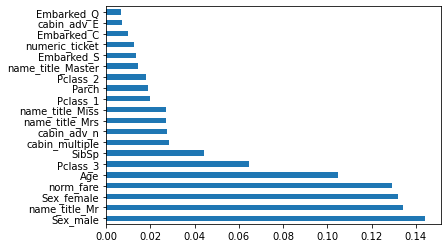

In [52]:
# bar graph of most important features in the best random forest model (larger is better)
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index = X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [53]:
# xtreme gradient boosting (randomized search)
xgb = XGBClassifier(random_state = 1)
param_grid = {'n_estimators': [20, 50, 100, 250, 500,1000],
              'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
              'max_depth': [2, 5, 10, 15, 20, 25, None],
              'reg_alpha': [0, 0.5, 1],
              'reg_lambda': [1, 1.5, 2],
              'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
              'learning_rate':[.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
              'gamma':[0, .01, .1, 1, 10, 100],
              'min_child_weight':[0, .01, 0.1, 1, 10, 100],
              'sampling_method': ['uniform', 'gradient_based']}
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb_rnd, 'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2575 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/mzheng/ds/titanic/venv/lib/python3.9/site-packages/xgboost/sklearn.py", line 1400, in fit
    self._Booster = train(
  File "/Users/m

XGB
Best Score: 0.8504094458198438
Best Parameters: {'subsample': 0.8, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 250, 'min_child_weight': 0.01, 'max_depth': 2, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 1}


In [54]:
# xtreme gradient boosting (grid search)
xgb = XGBClassifier(random_state = 1)
param_grid = {'n_estimators': [450, 500, 550],
              'colsample_bytree': [0.75, 0.8, 0.85],
              'max_depth': [None],
              'reg_alpha': [1],
              'reg_lambda': [2, 5, 10],
              'subsample': [0.55, 0.6, 0.65],
              'learning_rate': [0.5],
              'gamma': [0.5, 1, 2],
              'min_child_weight': [0.01],
              'sampling_method': ['uniform']}
clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled, y_train)
clf_performance(best_clf_xgb, 'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8503967498254299
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 550, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [55]:
# final submission results
# xgb has the highest tuned performance of 85%
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission.csv', index=False)

Model, Baseline, Tuned Performance

Naive Bayes, 72.6%, NA
Logistic Regression, 82.1%, 82.6%
Decision Tree, 77.6%, NA
K Nearest Neighbor, 80.5%, 83.0%
Random Forest, 80.6%, 83.6%
Support Vector Classifier, 83.2%, 83.2%
Xtreme Gradient Boosting, 81.8%, 85.3%

6. Additional Model Ensemble Approaches

1) Experimented with a hard voting classifier of three estimators (KNN, SVC, RF) (81.6%)

2) Experimented with a soft voting classifier of three estimators (KNN, SVC, RF) (82.3%) [Best Performance]

3) Experimented with soft voting on all estimators performing better than 80% excluding XGB (KNN, RF, LR, SVC) (82.9%)

4) Experimented with soft voting on all estimators performing better than 80% including XGB (KNN, RF, LR, SVC, XGB) (83.5%)

In [56]:
# best tuned models from before
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

# ensemble approaches using voting classifier
voting_clf_hard = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn', best_knn), ('rf', best_rf), ('svc', best_svc), ('lr', best_lr), ('xgb', best_xgb)], voting = 'soft')

print('voting_clf_hard :', cross_val_score(voting_clf_hard, X_train_scaled, y_train, cv=5))
print('voting_clf_hard mean :', cross_val_score(voting_clf_hard, X_train_scaled, y_train, cv=5).mean())

print('voting_clf_soft :', cross_val_score(voting_clf_soft, X_train_scaled, y_train, cv=5))
print('voting_clf_soft mean :', cross_val_score(voting_clf_soft, X_train_scaled, y_train, cv=5).mean())

print('voting_clf_all :', cross_val_score(voting_clf_all, X_train_scaled, y_train, cv=5))
print('voting_clf_all mean :', cross_val_score(voting_clf_all, X_train_scaled, y_train, cv=5).mean())

print('voting_clf_xgb :', cross_val_score(voting_clf_xgb, X_train_scaled, y_train, cv=5))
print('voting_clf_xgb mean :', cross_val_score(voting_clf_xgb, X_train_scaled, y_train, cv=5).mean())

voting_clf_hard : [0.83707865 0.80898876 0.84269663 0.80898876 0.87570621]
voting_clf_hard mean : 0.8346918047356059
voting_clf_soft : [0.8258427  0.8258427  0.83146067 0.79775281 0.87570621]
voting_clf_soft mean : 0.831321018218752
voting_clf_all : [0.83146067 0.82022472 0.83146067 0.79775281 0.87570621]
voting_clf_all mean : 0.831321018218752
voting_clf_xgb : [0.83146067 0.82022472 0.84269663 0.81460674 0.88135593]
voting_clf_xgb mean : 0.8380689392496666


In [58]:
# in a soft voting classifier, you can weight some models more than others. I use a grid search to explore different weightings
params = {'weights': [[1, 1, 1],[1, 2, 1],[1, 1, 2],[2, 1, 1],[2, 2, 1],[1, 2, 2],[2, 1, 2]]}
vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled, y_train)
clf_performance(best_clf_weight, 'VC Weights')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
VC Weights
Best Score: 0.83244461372437
Best Parameters: {'weights': [2, 2, 1]}


In [59]:
# make predictions using the voting_clf models + tuned rf
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)

y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft = voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)

In [61]:
# convert predictions to dataframe 
final_data_1 = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission_1 = pd.DataFrame(data=final_data_1)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

# compare all the predictions
final_data_comp = {'PassengerId': test.PassengerId, 'Survived_rf': y_hat_rf,'Survived_vc_hard': y_hat_vc_hard, 'Survived_vc_soft': y_hat_vc_soft, 'Survived_vc_all': y_hat_vc_all, 'Survived_vc_xgb': y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [64]:
# track differences between predictions 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis=1)
print(comparison.difference_rf_vc_hard.value_counts())

comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis=1)
print(comparison.difference_soft_hard.value_counts())

comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis=1)
print(comparison.difference_hard_all.value_counts())

0    407
1     11
Name: difference_rf_vc_hard, dtype: int64
0    411
1      7
Name: difference_soft_hard, dtype: int64
0    410
1      8
Name: difference_hard_all, dtype: int64


In [65]:
# prepare submission files 
submission_1.to_csv('submission_rf.csv', index=False)
submission_2.to_csv('submission_vc_hard.csv', index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)
submission_5.to_csv('submission_vc_xgb.csv', index=False)